# Neural Networks From the Ground Up
## The Perceptron
- A perceptron is a *binary classifier* in the sense that it takes *n* inputs and produces one output that is either a 0 or a 1. 
- For each input that comes into a perceptron, the input is multiplied by some weight. The results of all the products of inputs with their respective weights are summed. 
- If the sum is greater than some *threshold* value, then the perceptron outputs a 1. Otherwise, the perceptron outputs a 0.

- Eventually, we will see that we can write algorithms to "learn" the required weight values automatically. For now, we will select the weight values manually.

- Strictly speaking a Perceptron is an *algorithm*. However, we can also create program *objects* that capture the relevant data structures and logic associated with a Perceptron. 

- The following Perceptron class can be used to compute *some*, but not all boolean functions:

In [51]:
import numpy as np


class Perceptron (object):
    '''implementation of an artificial perceptron'''
    def __init__ (self, weights, threshold):
        '''`weights` is a numpy array of numbers'''
        self.weights = weights
        self.threshold = threshold
        
    def sum_of_products (self, inputs):
        return np.sum (inputs * self.weights)
    
    def step_function (self, z):
        '''returns the result of applying a step function to the sum of products`'''
        if z <= threshold:
            return 0
        return 1
    
    def compute (self, inputs):
        '''computes a result based on the supplied inputs, weights, and threshold.'''
        # sum of products is traditionally called `z`
        z = self.sum_of_products (inputs)
        # perceptron output is traditionally called `y`
        y = self.step_function (z)
        return y

From the above, we can see that the definition of a Perceptron is *very simple*. The Perceptron takes its inputs and feeds them into a sum of products function to obtain an intermediate output `z`. The Perceptron then takes the intermediate output `z` and feeds it into a step funciton to obtain a final result `y`. The value of `y` is either 0 or 1 depending upon whether or not the value of `z` surpasses the defined threshold value. 

Symbolically, the output `y` of a Perceptron is computed as:

y = step (sum_of_products (**x**, **w**)),

where both **x** and **w** are vectors of length *n*.

This definition of a Perceptron is motivated by the structure of a typical biological neuron, which takes in many inputs via its dendrites, and returns one output via its axon. The weights in an artificial neuron correspond to the connection strengths between biological neurons, the sum of products and step function in an artificial neuron correspond to the body of a biological neuron, and the output of the neuron corresponds to the signal sent down the axon of a biological neuron.

The following is an example of a Perceptron that computes the AND function:

In [2]:
weights = np.array ([0.5, 0.5])
threshold = 0.7

perceptron = Perceptron (weights, threshold)

# pass different input values to the same perceptron 
inputs = np.array ([0, 0])
print ('AND (0, 0):', perceptron.compute (inputs))

inputs = np.array ([1, 0])
print ('AND (1, 0):', perceptron.compute (inputs))

inputs = np.array ([0, 1])
print ('AND (0, 1):', perceptron.compute (inputs))

inputs = np.array ([1, 1])
print ('AND (1, 1):', perceptron.compute (inputs))

AND (0, 0): 0
AND (1, 0): 0
AND (0, 1): 0
AND (1, 1): 1


- We could have chosen many other combinations of weights and threshold values to compute the AND functions. 
- The point is that *only some choices work and others do not*.

TODOS:

1. motivate perceptron learning rule
2. graph what the line looks like of the perceptron
3. show the line for one perceptron. 
4. how the line for composed perceptrons in the case of XOR
5. show how the line changes in the context of training perceptrons

We can better understand how the Perceptron works by plotting the four possible input/output pairs associated with the AND function in the x1-x2 plane, where the symbol '+' at the point (x1, x2) indicatest that the output of the AND function is 1 at that point, and the symbol '-' means the output of the AND function is 0 at that point:

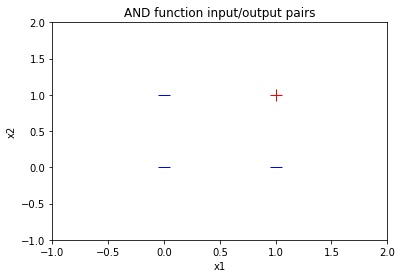

In [3]:
import matplotlib.pyplot as plt


plt.plot([1.0], [1.0], 'r+', markersize=12)
plt.plot([0], [0], 'b_', markersize=12)
plt.plot([1], [0], 'b_', markersize=12)
plt.plot([0], [1], 'b_', markersize=12)

plt.axis([-1, 2, -1, 2])

plt.xlabel ('x1')
plt.ylabel ('x2')
plt.title ('AND function input/output pairs')
plt.show ()

We can visualize how the Perceptron distinguishes between these points by deriving the equaiton for a line from the logic of the Perceptron.

The sum of products of our Perceptron has the form:

x1w1 + x2w2.

Since the threshold of 0.7 marks the cutoff point at which the output switches from 0 to 1, we can see that the equation for the boundary of the perceptron is:

x1w1 + x2w2 = 0.7.

Solving this equation for x2 in terms of x1, we have that:

x2 = f(x1) = (0.7 -x1w1) / w2

Plotting this line on our above graph, we get:

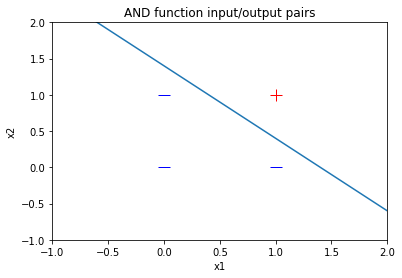

In [4]:
def perceptron_and_decision_boundary (x1):
    '''computes the descision boundary for the above Perceptron'''
    return (0.7 -x1*0.5) / 0.5

plt.plot([1.0], [1.0], 'r+', markersize=12)
plt.plot([0], [0], 'b_', markersize=12)
plt.plot([1], [0], 'b_', markersize=12)
plt.plot([0], [1], 'b_', markersize=12)

plt.axis([-1, 2, -1, 2])

# plot a line segment that connects two arbitrary points on the decision boundary 
x = [-1, 2]
plt.plot (x, [perceptron_and_decision_boundary (-1), perceptron_and_decision_boundary (2)])

plt.xlabel ('x1')
plt.ylabel ('x2')
plt.title ('AND function input/output pairs')
plt.show ()

From the above, we can see that a single Perceptron can only ever compute a boolean function if it is possible to draw a straight line in the x1, x2 plane that divides the various input/output pairs associated with that function. We call such a function *linearly separable*. 

If we draw a similar diagram for the XOR function, we can see at once that *no single Perceptron could ever learn the XOR function*:

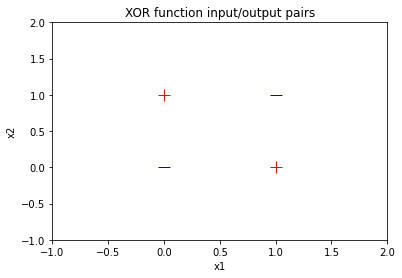

In [5]:
plt.plot([1.0], [1.0], 'b_', markersize=12)
plt.plot([0], [0], 'b_', markersize=12)
plt.plot([1], [0], 'r+', markersize=12)
plt.plot([0], [1], 'r+', markersize=12)

plt.axis([-1, 2, -1, 2])

plt.xlabel('x1')
plt.ylabel('x2')
plt.title ('XOR function input/output pairs')
plt.show ()

From the above diagram, we can see that regardless of how we choose to draw the line, one line by itself can never distinguish between the input/output pairs that have an output of 0, and the input/output pairs that have an output of 1 in the context of the XOR function. In other words, *one Perceptron is incapable of computing the XOR function*. We will see later how to work around this problem.

Although the above implementation of the Perceptron works, it will not generalize to a context in which we want to learn all relevant parameters automatically. In particular, we will eventually come up with an algorithm that allows the required weights to be learned automatically. However, as our Perceptron stands currently, we need to set the threshold value separately from the weights.

The trick that allows us to fold learning the threshold into the process that learns the weights is inclusion of an additional term called a *bias*. 

To see how we can use a bias to include the threshold in the weights, consider that the step function is defined as follows:

1. step (z) = 0 if z <= threshold 
2. step (z) = 1 if z > threshold 

The second condition is equivalent to the condition:

3. step (z) = 1 if z - threshold > 0.

In other words, we can simply set our "pseudo-threshold" to 0 and learn the real threshold by considering as just another term that is included in the sum of products (the minus sign can be corrected by learning the appropriate weight).

The following is an example of a Perceptron that computes the AND function using a bias term:

In [6]:
import numpy as np


class Perceptron (object):
    '''implementation of an artificial perceptron using a bias term'''
    def __init__ (self, weights):
        '''`weights` is a numpy array of numbers'''
        self.weights = weights
        
    def sum_of_products (self, inputs):
        # the input corresponding to the bias weight is always 1
        new_inputs = np.insert (inputs, 0, 1.0, axis=0)
        return np.sum (new_inputs * self.weights)
    
    def step_function (self, z):
        '''returns the result of applying the step function to the sum of products`'''
        if z <= 0:
            return 0
        return 1
    
    def compute (self, inputs):
        '''computes a result based on the supplied inputs, weights, and threshold.'''
        # sum of products is traditionally called `z`
        z = self.sum_of_products (inputs)
        # perceptron output is traditionally called `y`
        y = self.step_function (z)
        return y

# bias term is always first in the weight vector by convention    
weights = np.array ([-0.7, 0.5, 0.5])

perceptron = Perceptron (weights)

# pass different input values to the same perceptron 
inputs = np.array ([0, 0])
print ('AND (0, 0):', perceptron.compute (inputs))

inputs = np.array ([1, 0])
print ('AND (1, 0):', perceptron.compute (inputs))

inputs = np.array ([0, 1])
print ('AND (0, 1):', perceptron.compute (inputs))

inputs = np.array ([1, 1])
print ('AND (1, 1):', perceptron.compute (inputs))

AND (0, 0): 0
AND (1, 0): 0
AND (0, 1): 0
AND (1, 1): 1


Notice that in our above implementation of a Perceptron, we no longer need to explicitly pass in a threshold value as input. Instead, we adopt the convention that the threshold weight is first in the list of weights, and the input corresponding to that weight is always 1.

The following is an example of a Perceptron that computes the OR function:

In [7]:
weights = np.array ([-0.2, 0.5, 0.5])

perceptron = Perceptron (weights)

# pass different input values to the same perceptron 
inputs = np.array ([-0, 0])
print ('OR (0, 0):', perceptron.compute (inputs))

inputs = np.array ([1, 0])
print ('OR (1, 0):', perceptron.compute (inputs))

inputs = np.array ([0, 1])
print ('OR (0, 1):', perceptron.compute (inputs))

inputs = np.array ([1, 1])
print ('OR (1, 1):', perceptron.compute (inputs))

OR (0, 0): 0
OR (1, 0): 1
OR (0, 1): 1
OR (1, 1): 1


The following is an example of a Perceptron that computes the NAND function:

In [8]:
weights = np.array ([0.7, -0.5, -0.5])

perceptron = Perceptron (weights)

# pass different input values to the same perceptron 
inputs = np.array ([0, 0])
print ('NAND (0, 0):', perceptron.compute (inputs))

inputs = np.array ([1, 0])
print ('NAND (1, 0):', perceptron.compute (inputs))

inputs = np.array ([0, 1])
print ('NAND (0, 1):', perceptron.compute (inputs))

inputs = np.array ([1, 1])
print ('NAND (1, 1):', perceptron.compute (inputs))

NAND (0, 0): 1
NAND (1, 0): 1
NAND (0, 1): 1
NAND (1, 1): 0


It turns out that using our current Perceptron, we cannot compute the XOR function using just one Perceptron. This was famously pointed out by Minsky and Papert in their 1988 book "Perceptrons". The reason for this limitation the sum of products involved in our in our current definition of a Perceptron is a *linear* function. As a result, we can only use a Perceptron to compute functions whose input/output pairs can be seperated by a straight line, a plane, or a hyperplane (in more than 3 dimensions).

However, although we cannot compute the XOR function using just *one* Perceptron, we *can* compute the XOR function if we *compose* more than one Perceptron in a chain. This notion of composing multiple neurons to solve a problem that is impossible for just one neuron to solve is the central theme in the construction of arbtrarily complex neural networks.

In particular, it is known that the XOR function can be computed by composing the NAND, OR and AND functions together.

The following is an example of how multiple Perceptrons can be used to compute the NAND function:

In [9]:
def XOR (x1, x2):
    '''computes the XOR function by composing three perceptrons'''
    # collect inputs into an array
    inputs = np.array ([x1, x2])
    
    # initialize NAND perceptron
    weights_nand = np.array ([0.7, -0.5, -0.5])
    perceptron_nand = Perceptron (weights_nand)
    
    # initialize OR perceptron
    weights_or = np.array ([-0.2, 0.5, 0.5])
    perceptron_or = Perceptron (weights_or)
    
    # initialize AND perceptron
    weights_and = np.array ([-0.7, 0.5, 0.5])
    perceptron_and = Perceptron (weights_and)

    nand_result = perceptron_nand.compute (inputs)
    or_result = perceptron_or.compute (inputs)
    
    # AND together previous two results
    new_inputs = np.array ([nand_result, or_result])
    and_result = perceptron_and.compute (new_inputs)
    
    return and_result

# pass different input values to the same perceptron 
print ('XOR (0, 0):', XOR (0, 0))
print ('XOR (1, 0):', XOR (1, 0))
print ('XOR (0, 1):', XOR (0, 1))
print ('XOR (1, 1):', XOR (1, 1))

XOR (0, 0): 0
XOR (1, 0): 1
XOR (0, 1): 1
XOR (1, 1): 0


The above implementation of the XOR function uses a *multi-layer perceptron* consisting of three layers: one input layer followed by two perceptron layers. The first layer of the above perceptron network involves the inputs into the network, but does not include any perceptrons. The second layer of the network consists of one perceptron that computes the NAND function, and a second perceptron that computes the OR function. Each of the two inputs from the first layer of the network is passed to each perceptron in the first layer as inputs into that perceptron. The third and last layer of the above perceptron network consists of an AND perceptron. The AND perceptron receives one input from the output of the previous NAND gate, and a second input from the output of the previous OR gate.

It is known that any computer can be built out of only NAND gates. Therefore, the fact that perceptrons can be wired together to build a NAND gate impliest that an entire computer can be built out of perceptrons. 

We can think of such a network of Perceptrons as a *directed graph* where each node corresponds to one Perceptron. A directed edge from Perceptron A to Perceptron B indicates that the output of Perceptron A is fed into Perceptron B as input.

Now that we have included a bias term in our Perceptrons, the general equation for the decision boundary associated with a given Perceptron is:

w0x0 + w1x1 + w2x2 = 0

solving for x2 in terms of x1 and recalling that x0 is always set to 1 gives us:

x2 = f(x1) = -x1 * (w1 / w2) - (w0 / w2).

This corresponds to a straight line with slope w1 / w2 and with y-interecept -(w0 /w2). We can compute this function as follows:

We can visualize the decision boundaries learned by our above implementation of the XOR function as follows:

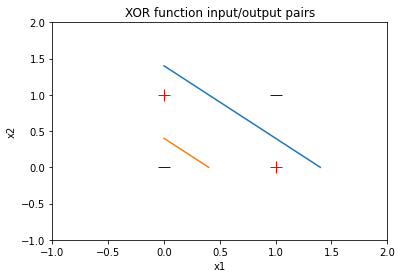

In [10]:
def get_points (w0, w1, w2):
    '''returns x and y coordinates of two points on the descision boundary of a Perceptron'''
    xs = [0, -w0 / w1]
    ys = [-w0 / w2, 0]
    return [xs, ys]

plt.plot([1.0], [1.0], 'b_', markersize=12)
plt.plot([0], [0], 'b_', markersize=12)
plt.plot([1], [0], 'r+', markersize=12)
plt.plot([0], [1], 'r+', markersize=12)

plt.axis([-1, 2, -1, 2])

# NAND
nand_points = get_points (0.7, -0.5, -0.5)
x = nand_points[0]
y = nand_points[1]
plt.plot (x, y)

# OR
or_points = get_points (-0.2, 0.5, 0.5)
x = or_points[0]
y = or_points[1]
plt.plot (x, y)

plt.xlabel ('x1')
plt.ylabel ('x2')
plt.title ('XOR function input/output pairs')
plt.show ()

From the above, we can see that although one Perceptron cannot compute the XOR function, multiple Perceptrons can learn the XOR function, since each Perceptron draws a different decision boundary, and these two decision boundaries can then be ANDed together.

In general, if a given network has *n* perceptrons, then it can distinguish between 2^n different categories.

## Training A Perceptron - based on *Neural Network Design*, by Demuth and De jesus

Above, we saw that if we can somehow figure out the required weights, we can set them manually on Perceptrons to compute various boolean functions. However, this is a tedious process that will not scale to solving difficult problems.

Instead, we are interested in a method that can *automatically discover* the weights required to compute a given function. 

In any Perceptron training situation, there are only three possible outcomes:

1. The out of the perceptron is 0 when it should have been a 1.
2. The output of the perceptron is 1 when it should have been a 0.
3. The output of the perceptron matches the expected output. 

The question now becomes: in the context of training, how can we update the weights at each step to get closer the expected output? 

In the first case, the output of the Perceptron is too low. Therefore, a reasonable idea is to *add* the input vector to the weight vector in the hopes of obtaining a larger output. 

In the second case, the output of the Perceptron is too high. Therefore, a reasonable idea is to *subtract* the input vector from the weight vector in the hopes of obtaining a smaller output.

In the third case, we do nothing to the weight vector, since if it ain't broke, don't fix it.

If we call the expected output `t` and the actual output of the Perceptron `y`, then we can summarize the above update rules as follows:

1. If `t` = 1 and `y` = 0, then the new weight vector equals whatever the old weight vector was, plus the input vector.

2. If `t` = 0 and `y` = 1, then the new weight vector equals whatever the old vector weight was, minus the input vector.

3. If `t` = `y`, then the new weight vector equals whatever the old weight vector was.

If we define the quantity `e` = `t` - `y`, then we can re-write the above three rules as:

1. `e` = 1, then the new weight vector equals whatever the old weight vector was, plus the input vector.

2. If `e` = -1, then the new weight vector equals whatever the old weight vector was, minus the input vector.

3. If `e` = 0, then the new weight vector equals whatever the old weight vector was.

Since `e` can only take on one of the three values -1, 1, or 0, we can condense the above three rules into just one update rule:

1. The new weight vecotr equals whatever the old weight vector was plus `e` multiplied by the input vector.

The strategy to train one Perceptron is then as follows:

1. initialize the weight vector to the zero vector.
2. Select one input/output pair.
3. Present the input values to the perceptron to compute the perceptron's output y.
4. If the output y is different from the expected output in the input/output pair, then adjust the weights according to the following rule:

The new weight vecotr equals `e` multiplied by the old weight vector.

5. Repeat steps 2, 3, and 4 until the perceptron predicts all examples correctly.

We can include the above training algorithm in an improved version of our Perceptron class and use it to compute the AND function:

In [55]:
import numpy as np

class PerceptronLearner (object):
    '''
       implementation of an artificial perceptron which includes a training method.
       
       based on https://www.thomascountz.com/2018/04/05/19-line-line-by-line-python-perceptron
    '''
    def __init__ (self, training_inputs, labels, iterations=100):
        self.training_inputs = training_inputs 
        self.labels = labels
        self.iterations = iterations
        num_inputs = len (training_inputs[0])
        self.weights = np.zeros (num_inputs + 1)
           
    def compute (self, inputs):
        '''returns the output of the Perceptron'''
        summation = np.dot (inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            return 1
        return 0

    def train (self):
        '''trains the perceptron to compute a linearly separable boolean function.'''
        for _ in range (self.iterations):
            for inputs, label in zip (self.training_inputs, self.labels):
                prediction = self.compute (inputs)
                self.weights[1:] += (label - prediction) * inputs
                self.weights[0] += (label - prediction)

# define training inputs
training_inputs = []
training_inputs.append (np.array([1, 1]))
training_inputs.append (np.array([1, 0]))
training_inputs.append (np.array([0, 1]))
training_inputs.append (np.array([0, 0]))

# list of expected output for each training input
labels = np.array ([1, 0, 0, 0])

# initialize the perceptron
perceptron = PerceptronLearner (training_inputs, labels)

# train the perceptron
perceptron.train ()

# use the trained Perceptron to compute the AND function 
input_1 = np.array ([0, 0])
print ('AND (0, 0):', perceptron.compute (input_1))

input_2 = np.array ([0, 1])
print ('AND (0, 1):', perceptron.compute (input_2))

input_3 = np.array ([1, 0])
print ('AND (1, 0):', perceptron.compute (input_3))

input_4 = np.array ([1, 1])
print ('AND (1, 1):', perceptron.compute (input_4))

AND (0, 0): 0
AND (0, 1): 0
AND (1, 0): 0
AND (1, 1): 1


## From Perceptrons to Neurons

The Perceptron model we saw above was originally set forth by McCulloch and Pitts in their 1943 paper, "A Logical Calculus of the Ideas Immanent in Nervous Activity" as a mathematical model of a single biological neuron. 

However, it turns out that **Perceptrons are hard to train**, in the sense of writing an algorithm that can *automatically* find the weights required to compute a given function. 

The difficulty of automatically training Perceptrons motivates us to look for a more *general* construct that easier to train than a Perceptron. 

We generalize the Perceptron by noticing that the computation performed by a peceptron involves composing two functions.

1. One function *f* that computes the sum of products between the inputs and the weights.
2. A second function *g* that takes the output of *f* as input and returns 1 if the sum of products is above the threshold, and 0 otherwise. We call such a function that outputs either 0 or 1 a *step function*, because its graph looks like a step.

The observation that two functions are involved in a Perceptron's computation leads us to realize that we can generalize the Perceptron idea by keeping the first function that computes the sum of products, but *swapping out the second function for some other function instead*. 

We call whatever function we choose as this second function an *activation function*. The activation function can be any function that we find makes it easier for us to learn the required weights in an automated fahsion. In other words, the search space for finding a suitable activation function is the set of *all* functions that map R -> R. This is a *massive* search space! 

When we use an activation function other than a step function, we call the resulting unit a *neuron* rather than a *perceptron*.

The step function used in the definition of a Perceptron is difficult to train automatically because it is not *differentiable at its transition point*. We can see why this is so by looking at the graph of a step function:

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def step_function (x):
    '''given a numpy array, returns a numpy array that 
       maps each element of the input array to the result of 
       applying the step function to that array element.
    '''
    return np.array (x > 0, dtype=int)

# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the corresponding output NumPy array
y = step_function (x)

# plot input and output arrays
plt.plot (x, y)

# specify the range of the y-axis
plt.ylim (-0.1, 1.1)

# title
plt.title ('step function')
plt.show ()

From the above, we can see that the graph of the step function transitions sharply from an output of 0 to an output of 1 when the input changes from being less than or equal to 0 to being strictly greater than 0. As a result, we cannot compute a tangent line at that point, and the function is not differentiable when the input equals 0. A step function is often called a "staircase function" because of the way it looks.

One popular choice of an activation function which *is* differentiable is the *sigmoid function*, which can be computed in Python as follows:

In [ ]:
def sigmoid (x):
    '''given a numpy array, returns a numpy array that 
       maps each element of the input array to the result of 
       applying the sigmoid function to that array element.
    '''
    # leverages NumPy broadcasting 
    return 1 / (1 + np.exp(-x))

# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the corresponding output NumPy array
y = sigmoid (x)

# plot input and output arrays
plt.plot (x, y)

# specify the range of the y-axis
plt.ylim (-0.1, 1.1)

# title
plt.title ('sigmoid function')
plt.show ()

We can better compare the step function with the sigmoid function if we plot them both on the same graph:

In [ ]:
# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the corresponding output NumPy array
y1 = step_function (x)

# obtain the corresponding sigmoid output NumPy array
y2 = sigmoid (x)

# draw step function with a solid line
plt.plot (x, y1, label="step function")

# draw sigmoid function with a dashed line
plt.plot (x, y2, linestyle = "--", label="sigmoid function")

# Label of the x axis
plt.xlabel ("inputs")

# Label of the y axis
plt.ylabel ("outputs")

# title
plt.title ('step and sigmoid functions')

plt.legend ()
plt.show ()

From the above, we can see that the sigmoid function is a smooth generalization of the step function in the following ways:

1. Whereas the the step function can only output either a 0 or a 1, the sigmoid functions can output all possible values in the entire interval from 0 to 1.
2. Both functions have the property that when the input is close to 0, the output is close to 0 or equal to 0, and when the input is close to 1, the output is close to or equal to 1.
3. Both functions are *nonlinear*.

Another popular activation function is the rectified linear unit (ReLU) function, which looks as follows:

In [ ]:
def relu (x):
    '''given a numpy array, returns a numpy array that 
       maps each element of the input array to the result of 
       applying the ReLU function to that array element.
    '''
    return np.maximum (0, x)

# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the corresponding output NumPy array
y = relu (x)

# plot input and output arrays
plt.plot (x, y)

# specify the range of the y-axis
plt.ylim (-0.1, 1.1)

# title
plt.title ('ReLU function')
plt.show ()

## Measuring the Error 

So far, we have seen that a neural network is a composition of many neurons, each of which involves the following:

1. Some number of inputs.
2. A different weight corresponding to each input.
3. A sum of products that multiplies each input by its corresponding weight and then sums all of the products to obtain one number.
4. An activation function that take the sum of products as input and returns one number as output.

However, we still do not know how to automatically train such a network to compute a desired output. The key idea in automating this task is to measure the error of a neural network relative to the desired output, and to then adjust the weights of each neuron in the network based upon how far the output of the network is from the desired result. 

In other words, if we want to make progress towards learning the weights of the network in an automated way, we must formalize the distance of the networks output from the desired output. 

We measure the error of the network using a function called a *loss*, *cost* or *objective* function. There are *many* different kinds of loss functions that we can use to measure how well a given neural network is performing. 

One of the simplest loss functions is the *quadratic loss function*. This function subtracts the vector output of the network from the desired output and then squares the result. 

In Python, the quadratic loss function looks as follows:

In [ ]:
from mpl_toolkits.mplot3d import axes3d


x_inputs = np.arange (-5,5, 0.1)
y_inputs = np.arange (-5,5, 0.1)

x, y = np.meshgrid (x_inputs, y_inputs)
z = np.square (x - y)


fig = plt.figure (figsize=(6,6))
ax = fig.add_subplot (111, projection='3d')


# Plot a 3D surface
ax.plot_surface(x, y, z)

plt.show()

At any given point in time, our error measurement will live somewhere on the above surface. Training a neural network works by iteratively adjusting the weights of the network such that over time, the measured error is as small as possible. 

Now that we understand the notion of measuring the error, we must learn how to find the inputs into the error function that correspond to the *smallest* output of the error function. For this, we will need differential calculus.

## Finding the Minimum of a Function with the Derivative

Above, we saw that to train a neural network, we need to minimize a function that takes at least two inputs and returns one output (i.e. it maps Rn -> R. However, before we can do this, we must learn how to minimize a function that takes just one input and returns one output (i.e. it maps R -> R).

The primary mathematical tool that allows us to find the minimum of a function is the derivative. 

Conceptaully, the derivative is a higher-order function that takes one function as input and returns one function as output. 

The output of the derivative is a function that measures the rate of change at each input value of the input function.

For example, consider the following function:

- *f*: R -> R
- *f* (x) = x

The function *f* takes a real number as input and returns the same real number as output. For this reason, the function *f* is called the *identity function*.

This function looks like a line when we plot it:

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def identity_function (x):
    '''given a numpy array, returns a numpy array that 
       maps each element of the input array to the result of 
       applying the identity function to that array element.
    '''
    return x

# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the corresponding output NumPy array
y = identity_function (x)

# plot input and output arrays
plt.plot (x, y)

# specify the range of the y-axis
plt.ylim (-5.0, 5.0)

# title
plt.title ('identity function')
plt.show ()

The derivative is a generalization of the notion of slope. In general, the slope between two input/output pairs of the form (x1, y1) and (x2, y2) is computed using the formla:

slope = (y1 - y2) / (x2 - x1).

We can compute the slope for any two such pairs, regardless of how far appart the two inputs x1 and x2 are from each other. 

In contrast, the derivative is computed by assuming that the two inputs are *arbitrarily close* to each other and then measuring the slope between the two corresponding input/output pairs.

In the case of the identity function, the slope between any two arbitrarily close points is always the same. Therefore, when we feed the identity function into the derivative as input, we obtain as output a constant function that maps each input to the same output. In particular, we obtain the follwoing function as the derivative of the function *f*:

- *g*: R -> R
- *g* (x) = 1

We can plot the functions *f* and *g* on the same graph to get a better sense of how they relate to each other:

In [ ]:
def derivative_of_identity (x):
    '''given a numpy array, `x` applies the derivative of the identity function 
       to each input and returns the result as a numpy array.'''
    length = x.size
    return np.ones (length)

# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the identity function
y1 = identity_function (x)

# obtain the derivative of the identity function as a NumPy array
y2 = derivative_of_identity (y1)

# draw identity function with a solid line
plt.plot (x, y1, label="identity function")

# draw constant function with a dashed line
plt.plot (x, y2, linestyle = "--", label="derivative of constant function")

# Label of the x axis
plt.xlabel ("inputs")

# Label of the y axis
plt.ylabel ("outputs")

# title
plt.title ('step and sigmoid functions')

plt.legend ()
plt.show ()

Now that we understand the basic concept of a derivative, let's consider how to compute the derivative for arbitrarily complex functions.

A first naive approach is to simply add a very small amount to each input and then compute the slope based on the two inputs obtained in that way. Obtaining the derivative in this way is called *numerical differentiation*. 

This approach looks as follows:

In [ ]:
def numerical_derivative (f, x):
    '''given a function `f` and a NumPy input vector `x`, 
    returns the derivative of f at all points in x'''
    h = 1e-50
    return (f(x+h) - f(x)) / h

# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the identity function
y1 = identity_function (x)

# obtain the derivative of the identity function as a NumPy array
y2 = numerical_derivative (identity_function, x)

# draw identity function with a solid line
plt.plot (x, y1, label="identity function")

# draw constant function with a dashed line
plt.plot (x, y2, linestyle = "--", label="derivative of constant function")

# Label of the x axis
plt.xlabel ("inputs")

# Label of the y axis
plt.ylabel ("outputs")

# title
plt.title ('identity function and its derivative')

plt.legend ()
plt.show ()

So far, our approach is able to reproduce the same result we obtained above based on intuition. Let's see what happens if use our new tool to compute the derivative of the squaring function:

In [ ]:
def squaring_function (x):
    return np.square (x)

# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the identity function outputs
y1 = squaring_function (x)

# obtain the derivative outputs of the identity function as a NumPy array
y2 = numerical_derivative (squaring_function, x)

# draw identity function with a solid line
plt.plot (x, y1, label="squaring function")

# draw constant function with a dashed line
plt.plot (x, y2, linestyle = "--", label="derivative of squaring function")

# Label of the x axis
plt.xlabel ("inputs")

# Label of the y axis
plt.ylabel ("outputs")

# title
plt.title ('squaring function and its derivative')

plt.legend ()
plt.show ()

Wait! we got the wrong answer!

It is known that the derivative of the squaring function is the function:

- *f*: R -> R
- *f* (x) = 2x

However, the above computation gives the **false impression** that the derivative of the squaring function is the zero function that maps each input to zero! 

The reason for this discrepancy is *rounding error*.

The following code snippet shows more clearly how such rounding error comes about:

In [ ]:
np.float32 (1e-50)

From the above, we can see that *the machine is incapable of dealing with points that are arbitrarily close to each other*. This limitation is due to the fact that real numbers can only be represented with *infinite* decimals expansions, yet we can only every store a *finite* number of decimals places in the machine at any given time due to memory constraints.

The first improvement we can make is to make the points farther apart from each other in our numerical computation of the derivative:

In [ ]:
def numerical_derivative (f, x):
    '''given a function `f` and a NumPy input vector `x`, 
    returns the derivative of f at all points in x'''
    h = 1e-4
    return (f (x + h) - f (x)) / h


# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the identity function outputs
y1 = squaring_function (x)

# obtain the derivative outputs of the identity function as a NumPy array
y2 = numerical_derivative (squaring_function, x)

# draw identity function with a solid line
plt.plot (x, y1, label="squaring function")

# draw constant function with a dashed line
plt.plot (x, y2, linestyle = "--", label="derivative of squaring function")

# Label of the x axis
plt.xlabel ("inputs")

# Label of the y axis
plt.ylabel ("outputs")

# title
plt.title ('squaring function and its derivative')

plt.legend ()
plt.show ()

Notice that by using the larger step size of 10^-4 in our compuation of the derivative instead of our previous step size of 10^-50, we obtained the correct derivative of f(x) = 2x instead of f(x) = 0.

A second improvement we can make to get more accurate results is to use the *central difference* in our compuation of the derivative, which takes into account both what happens if we *add* a small amount to any input, or if we *subtract* a small amount from any input:

In [ ]:
def numerical_derivative (f, x):
    '''given a function `f` and a NumPy input vector `x`, 
    returns the derivative of f at all points in x'''
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)

# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the identity function outputs
y1 = squaring_function (x)

# obtain the derivative outputs of the identity function as a NumPy array
y2 = numerical_derivative (squaring_function, x)

# draw identity function with a solid line
plt.plot (x, y1, label="squaring function")

# draw constant function with a dashed line
plt.plot (x, y2, linestyle = "--", label="derivative of squaring function")

# Label of the x axis
plt.xlabel ("inputs")

# Label of the y axis
plt.ylabel ("outputs")

# title
plt.title ('squaring function and its derivative')

plt.legend ()
plt.show ()

Now that we understand how to compute the derivaitve of a function that takes one input and returns one output, let's consider how we can use the derivaitve as a tool to help us find the input into a function that corresponds to the smallest output.

As an example, consider the following function:

In [ ]:
def f (x):
    '''some complicated function'''
    return 6*x**4 + 2*x**3 -4*x**2 - 12*x + 3

# create a NumPy array containing values from -5.0 to 5.0 in increments of 0.1
x = np.arange (-5.0, 5.0, 0.1)

# obtain the function outputs for f
y = f (x)

# draw identity function with a solid line
plt.plot (x, y, label="some complicated function")

# Label of the x axis
plt.xlabel ("inputs")

# Label of the y axis
plt.ylabel ("outputs")

# title
plt.title ('some complicated function')

plt.legend ()
plt.show ()

Now, suppose that we want to find the input into the above function *f* that yields the smallest output value. It turns out that we can use the derivative to solve this minimization problem.

The following code snippet demonstrates the basic idea:

The algorithm that uses the derivative to solve this minimization problem is called the *gradient descent algorithm*. To demonstrate how gradient descent works, we will pretend that we already know the derivative of our complicated function from the standard rules of calculus:

In [ ]:
def derivative_of_complicated_function (x):
    return 12 * x - 12

x = np.arange (-5.0, 5.0, 0.1)

# Label of the x axis
plt.xlabel ("inputs")

# Label of the y axis
plt.ylabel ("outputs")

# title
plt.title ('some complicated function')
plt.plot(x,f(x))


# define starting input and step size for each iteration
current_input = -4.0
step_size = 0.03

for i in range (15):
    plt.plot(current_input, f(current_input), marker='o', color='r')
    current_input = current_input - step_size * derivative_of_complicated_function (current_input)

print (f'the minimum of the function is approximately: {current_input}')

From the above, we can see that after only 15 iterations, the above gradient descent algorithm was able to zero-in on the input value which yields the smallest output value for our function. When an algorithm gives us the result we want in a relatively small number of iterations, we say that it *converges rapidly*. If we want a more accurate result, we can increase the number of iterations:

In [ ]:
x = np.arange (-5.0, 5.0, 0.1)

# Label of the x axis
plt.xlabel ("inputs")

# Label of the y axis
plt.ylabel ("outputs")

# title
plt.title ('some complicated function')
plt.plot (x,f(x))

# define starting input and step size for each iteration
current_input = -4.0
step_size = 0.03

for i in range (100):
    plt.plot(current_input, f(current_input), marker='o', color='r')
    current_input = current_input - step_size * derivative_of_complicated_function (current_input)

print (f'the minimum of the function is approximately: {current_input}')

Analytically, we know that the minumum of a function can be found by finding which input causes its derivative to return 0. Since the derivative of f is the function g (x) = 12 * x - 12, we know that plugging in 1 to the function g will return a result of 0. Therefore, we can see that our above gradient descent algorithm agrees very closely with the result we would have obtained analytically.

Now that we know how to solve the minimization for functions that take one input and return one input, we can consider how to solve the minimzation problem for functions that take two inputs and return one input. This generalized version of the gradient descent algorithm depends upon the notion of a *partial derivative*, so we'll take a quick detour into the realm of partial derivatives and then return to implement our generalized gradient descent algorithm.

## Partial Derivatives and Generalized Gradient Descent

In the case of a function that takes more than one input, we can add a small amount to any of the inputs, and measure the resulting change in the function's output. 

The partial derivative allows us to vary just one input at a time and measure the resulting change in the function's output. In the case of computing the partial derivative, it is easier to use *symbolic computing* than numerical computing to compute the various partial derivatives of a function.

We can define a function symbolically and then apply it to an input as follows:

In [ ]:
from sympy import *
 
# create a "symbol" called x
x = Symbol ('x')
 
# define a symbolic function
f = x ** 2

print ('the function is:', f)

# obtain a usuable function from the above symbolic function
f1 = lambdify (x, f)

# pass an input to the usuable function
print ('f (4) is:', f1 (2))

Now that we know how to use symbolically defined functions, we can find the symbolic derivative of a function and then apply that derivative to an input:

In [ ]:
# define x as a symbol that will be used
x = Symbol ('x')

# define a symbolic function using the above symbol
f = x ** 5

print ('original function is:', f)

derivative_f = f.diff (x)

print ('derivative of the function is:', derivative_f)

# obtain a usuable function from the above symbolic function
f1 = lambdify (x, derivative_f)

print ('derivative applied to the input 2 is:', f1 (2))

Let's now apply these tools to a function that takes two inputs and compute the parital derivatives of that function:

In [ ]:
x , y = symbols ('x y')
f = x ** 2 + y ** 2

print ('original function is:', f)

# fnd the partial derivative of f with respect to its first input
partial_derivative_wrt_x = f.diff (x)

print ('partial derivative of f with respect to x is:', partial_derivative_wrt_x)

# fnd the partial derivative of f with respect to its second input
partial_derivative_wrt_y = f.diff (y)

print ('partial derivative of f with respect to y is:', partial_derivative_wrt_y)

Although we can use sympy to compute partial derivatives, this process is even easier with the *autograd* library, since it does not require us to define symbols, and does not work with algebraic experssions, which can potentially consume large amounts of memory. 

As a start, we first show how to copmute the derivative of a function that takes one input and returns one output using autograd:

In [ ]:
# thinly wrapped numpy library
import autograd.numpy as np
# main workhorse of autograd
from autograd import grad

# define a function like normal with Python and Numpy
def square (x):
    return np.square (x)

# create a function to compute the gradient
square_derivative = grad (square)

# evaluate the derivative at a particular input
print ('when the input to the derivative of the square function is 4.0, the output is:', square_derivative (4.0) )

If we are dealing with a function that takes more than one input and returns one output, then we can use autograd to compute the partial derivatives of that function. Autograd takes the persepctive that a function of multiple inputs can be seen as a function that takes just one vector input.

For example:

In [ ]:
def f (x, y):
    return np.square (x) + np.square (y)

# compute the parital derivative of f w.r.t the first input
first_partial = grad(f, 0)

# compute the parital derivative of f w.r.t the second input
second_partial = grad (f, 1)

print ('first partial applied to (2.0, 3.0) is:', first_partial (2.0, 3.0))
print ('second partial applied to (2.0, 3.0) is:', second_partial (2.0, 3.0))

We could have acheived a similar result ourselves using numerical differentiation as follows:

In [ ]:
def first_partial_custom (f, x, y):
    '''given a function `f` and two inputs, 
       computes the partial derivative with respect to the first input.'''
    h = 1e-4
    return (f(x + h, y) - f(x, y)) / h

def second_partial_custom (f, x, y):
    '''given a function `f` and two inputs, 
       computes the partial derivative with respect to the second input.'''
    h = 1e-4
    return (f (x, y + h) - f (x, y)) / h

print ('first partial applied to (2.0, 3.0) is:', np.round (first_partial_custom (f, 2.0, 3.0), 2))
print ('second partial applied to (2.0, 3.0) is:', np.round (second_partial_custom (f, 2.0, 3.0), 2))

Now that we understand how to compute partial derivatives in Python, we can generlize our previous gradient descent algorithm to any function that takes n inputs and returns one output. The algorithm for generalized gradient descent is very similar to our previous gradient descent algorithm, except that it uses partial derivatives instead of one regular derivative. 

For example, in the case of our function f above, it is intuitively clear that the input of this function which yields the smallest output is the ordered pair (0,0), since any number squared is always positive. 

We can verify this intuition using the generalized gradient descent algorithm:

In [ ]:
def f (x, y):
    return np.square (x) + np.square (y)

# define starting input and step size for each iteration
current_x = -4.0
current_y = 5.0
step_size = 0.03

# compute the parital derivative of f w.r.t the first input
first_partial = grad(f, 0)

# compute the parital derivative of f w.r.t the second input
second_partial = grad (f, 1)

# iterate as many times as required to reach convergenece
for i in range (150):
    current_x = current_x - step_size * first_partial (current_x, current_y)
    current_y = current_y - step_size * second_partial (current_x, current_y)

print (f'the minimum of the function is approximately: ({abs(np.round(current_x, 2))}, {np.round(current_y, 2)})')

To visualize how gradient descent works in the case of a function that takes two inputs and returns one output would usually require a 3-dimensional plot. However, we can accomplish the same goal in two dimensions using a contour plot:

In [ ]:
def f (x, y):
    return np.square (x) + np.square (y)

N = 100
x,y = np.meshgrid (np.linspace (-5, 5, N), np.linspace (-5,5,N))
z = f (x,y)
plt.contourf(x,y,z,10, cmap="Greys")
plt.contour(x,y,z,10, colors='k', linewidths=1)
plt.title ('some complicated function')

# define starting input and step size for each iteration
current_x = -4.0
current_y = 5.0
step_size = 0.03

# compute the parital derivative of f w.r.t the first input
first_partial = grad (f, 0)

# compute the parital derivative of f w.r.t the second input
second_partial = grad (f, 1)

# iterate as many times as required to reach convergenece
for i in range (150):
    plt.plot([current_x, current_x],[current_y, current_y], marker='o', linestyle='dotted', color='k')    
    current_x = current_x - step_size * first_partial (current_x, current_y)
    current_y = current_y - step_size * second_partial (current_x, current_y)

From the above countour plot, we can see that our function f has the shape of a bowl, and the generalized gradient descent algorithm is able to climb down the sides of the bowl and to figure out that the bottom of the bowl lives at the point (0, 0, 0) in R3.

We now have all the conceptual tools we need to start building a neural network than can automatically learn the weights required to compute a desired function.

## Training a Neural Network

Above, we saw that the XOR function can be computed by composing perceptrons for the OR, AND and NAND functions and *manually* selecting appropriate weights for each perceptron. In this section, we will see that these weights can be learned *automatically*.



Above, we saw that we can train each perceptron independently and then compose the perceptrons after training. However, in general, *we don't know beforehand how to compose the nodes of our network to compute a given function*. 

As a result, we *generally need to train all of the nodes in our network together*. The primary tool for training all of the nodes in a neural network together is the *backpropagation algorithm*.

For input [1, 0] output is 1
For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 1] output is 0


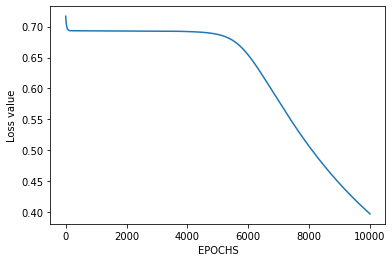

In [57]:
# based on https://github.com/shayanalibhatti/Coding-neural_network-for-XOR-logic-from-scratch/blob/master/neural_network_xor_logic_from_scratch.ipynb

# TODO: use a class
# TODO: use autograd

# These are XOR inputs
x = np.array([[0,0,1,1],[0,1,0,1]])

# These are XOR outputs
y = np.array([[0,1,1,0]])

# Number of inputs
n_x = 2

# Number of neurons in output layer
n_y = 1

# Number of neurons in hidden layer
n_h = 2

# Total training examples
m = x.shape[1]

# Learning rate
lr = 0.1

# Define random seed for consistent results
np.random.seed (2)

# Define weight matrices for neural network
w1 = np.random.rand (n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.rand (n_y,n_h)   # Weight matrix for output layer

# I didnt use bias units
# We will use this list to accumulate losses
losses = []

# I used sigmoid activation function for hidden layer and output
def sigmoid (z):
    z = 1 / (1 + np.exp (-z))
    return z

# Forward propagation
def forward_prop (w1,w2,x):
    z1 = np.dot (w1,x)
    a1 = sigmoid (z1)   
    
    z2 = np.dot (w2,a1)
    a2 = sigmoid (z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop (m,w1,w2,z1,a1,z2,a2,y):
    
    dz2 = a2 - y
    dw2 = np.dot (dz2,a1.T) / m
    dz1 = np.dot (w2.T, dz2) * a1 * (1 - a1)
    dw1 = np.dot (dz1, x.T) / m
    dw1 = np.reshape (dw1, w1.shape)
    
    dw2 = np.reshape (dw2, w2.shape)    
    return dz2,dw2,dz1,dw1

iterations = 10000
for i in range (iterations):
    z1, a1, z2, a2 = forward_prop (w1, w2, x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append (loss)
    da2, dw2, dz1, dw1 = back_prop (m, w1, w2, z1, a1, z2, a2, y)
    w2 = w2-lr * dw2
    w1 = w1-lr *dw1

# We plot losses to see how our network is doing
plt.plot (losses)
plt.xlabel ("EPOCHS")
plt.ylabel ("Loss value")

def predict (w1,w2,input):
    z1, a1, z2, a2 = forward_prop(w1, w2, test)
    a2 = np.squeeze (a2)
    if a2 >= 0.5:
        print ("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print ("For input", [i[0] for i in input], "output is 0")
        
test = np.array ([[1],[0]])
predict (w1,w2,test)
test = np.array ([[0],[0]])
predict (w1,w2,test)
test = np.array ([[0],[1]])
predict (w1,w2,test)
test = np.array ([[1],[1]])
predict (w1,w2,test)